# FORMULA 1 RACE ANALYSIS

![F1 Logo](\F1.jpg)


## "Formula 1 isn't just a sport; it's a captivating blend of cutting-edge technology, heart-stopping speed, and unyielding passion that transcends borders and cultures." - Formula 1 Official Website

### Introduction

Formula 1 (a.k.a. F1 or Formula One) is the highest class of single-seater auto racing sanctioned by the Fédération Internationale de l'Automobile (FIA) and owned by the Formula One Group. The FIA Formula One World Championship has been one of the premier forms of racing around the world since its inaugural season in 1950. The word "formula" in the name refers to the set of rules to which all participants' cars must conform. A Formula One season consists of a series of races, known as Grands Prix, which take place worldwide on purpose-built circuits and on public roads.

### Content

The dataset consists of all information on the Formula 1 races. The dataset was found on kaggle
https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/data and is shared with a License CC0: Public Domain. 
- drivers, 
- constructors, 
- qualifying, 
- circuits, 
- lap times, 
- pit stops, 
- championships from 1950 till the latest 2023 season.

This F1 dataset consists of 14 csv files. Depending on our requirement we merged the dataframes to achive the analysis.

##  How does performance in qualifying sessions correlate with race outcomes in Formula 1?


In F1 races the most important thing is achieving the right balance between speed and strategy. There are many facts that can have effect on the race outcome. Three of the main facts are speed, stratergy and driver skill. So base on these we come up with three sub  questions that can help us to analyze the race outcome.

### Sub-Questions:

#### 1. What is the relationship between grid positions achieved in qualifying sessions and finishing positions in races?
##### 2. Do drivers who perform well in qualifying sessions tend to achieve faster race lap times compared to those who start further back on the grid?
##### 3. How does the performance of drivers vary on street circuits compared to traditional circuits (located in Europian region)  in terms of their average qualifying positions?

Hypothesis:
1. Higher grid positions in qualifying sessions will generally result in better finishing positions in races.
2. Drivers who excel in qualifying sessions will likely achieve faster race lap times compared to those starting further back on the grid.
3. Performance of drivers on street circuits in Europe may differ from their performance on traditional circuits, with potential variations in average qualifying positions.

In [1]:
# Importing the libraries and loading the required csv files for analysis. 
import pandas as pd
import matplotlib.pyplot as plt

driver_standings = pd.read_csv('driver_standings.csv')
qualifying = pd.read_csv('qualifying.csv')
lap_times = pd.read_csv('lap_times.csv')
races = pd.read_csv('races.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
circuits = pd.read_csv('circuits.csv')

In [2]:
# Merge datasets
merged_data = pd.merge(driver_standings, qualifying, on=['raceId', 'driverId'])
merged_data = pd.merge(merged_data, lap_times, on=['raceId', 'driverId'])
merged_data = pd.merge(merged_data, races, on='raceId')

# Remove duplicate rows based on driverId and raceId
merged_data = merged_data.drop_duplicates(subset=['driverId', 'raceId'])

# Display the first few rows of the cleaned dataset
print(merged_data.head())

     driverStandingsId  raceId  driverId  points  position_x positionText  \
0                    1      18         1    10.0           1            1   
58                   2      18         2     8.0           2            2   
116                  3      18         3     6.0           3            3   
174                  4      18         4     5.0           4            4   
232                  5      18         5     4.0           5            5   

     wins  qualifyId  constructorId  number  ...  fp1_date fp1_time fp2_date  \
0       1          1              1      22  ...        \N       \N       \N   
58      0          5              2       3  ...        \N       \N       \N   
116     0          7              3       7  ...        \N       \N       \N   
174     0         12              4       5  ...        \N       \N       \N   
232     0          3              1      23  ...        \N       \N       \N   

    fp2_time  fp3_date  fp3_time quali_date  quali_time 

In [3]:
# Check column names of driver_standings DataFrame
print(driver_standings.columns)

# Check column names of qualifying DataFrame
print(qualifying.columns)

Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'positionText', 'wins'],
      dtype='object')
Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')


#### 1. What is the relationship between grid positions achieved in qualifying sessions and finishing positions in races?

In Formula 1 races, drivers first compete in qualifying sessions to determine their starting positions on the grid for the race. The grid position is crucial because it determines the initial order in which drivers start the race. Typically, drivers aim to secure the highest possible grid position in qualifying to gain a strategic advantage at the start of the race.

The relationship between grid positions achieved in qualifying sessions and finishing positions in races is an important aspect of F1. It reflects how well a driver's performance in qualifying translates into their performance during the actual race.
Therefore, analyzing the relationship between qualifying positions and finishing positions helps to understand the importance of qualifying performance in determining race outcomes in Formula 1.

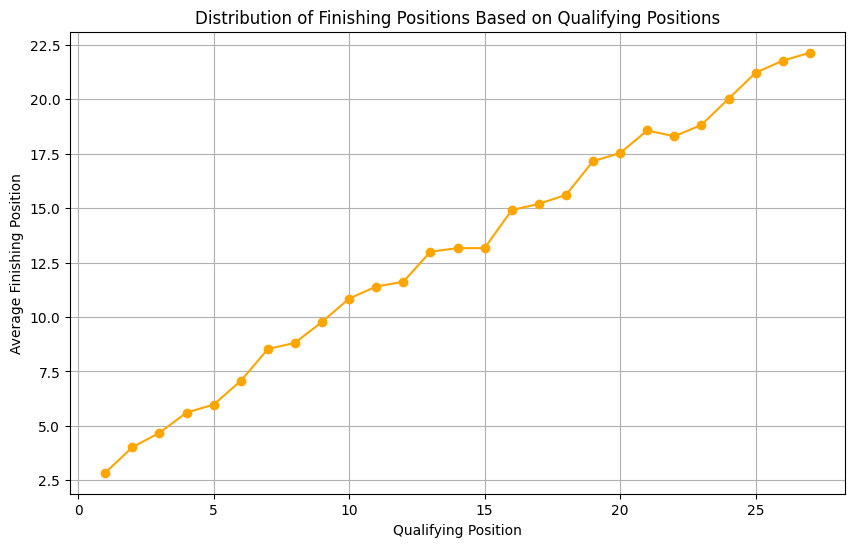

In [4]:
# Group the data by qualifying positions and calculate the average finishing position for each group
avg_finishing_positions = merged_data.groupby('position_x')['position_y'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_finishing_positions.index, avg_finishing_positions.values, marker='o', color='orange', linestyle='-')

# Add labels and title
plt.xlabel('Qualifying Position')
plt.ylabel('Average Finishing Position')
plt.title('Distribution of Finishing Positions Based on Qualifying Positions')

# Show the plot
plt.grid(True)  # Add grid lines for better visualization
plt.show()


**Analysis :**

If a driver starts the race from a higher grid position which means starting from pole position or near the front of the grid, they have a better chance of finishing the race in a lower position. So performing a good race in qualifying session and securing a better grid position is crucial aspect for F1 racers. This provides with several advantages like drivers have cleaner air,less traffic, and a better chance to avoid incidents in the opening laps. This can translate into maintaining or even improving their position during the race.
Conversely, if a driver starts from a lower grid position (e.g., starting from the back of the grid), they face more challenges in overtaking other cars  especially on circuits where it's difficult to pass due to narrow tracks or limited opportunities and may finish lower in the race standings.Also when analyzing graph carefully we can notice the drivers who starting the race from the grid position range 10-15 still manage to have a good average finishing postion, therefore we can assume they keep a good race stratergies to keep the close race between the other drivers in that range. 
 

##### 2. Do drivers who perform well in qualifying sessions tend to achieve faster race lap times compared to those who start further back on the grid?

In [5]:
# Merge datasets on common columns
merged_data = pd.merge(qualifying, lap_times, on=['raceId', 'driverId'])

# Print column names
print(merged_data.columns)

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position_x', 'q1', 'q2', 'q3', 'lap', 'position_y', 'time',
       'milliseconds'],
      dtype='object')


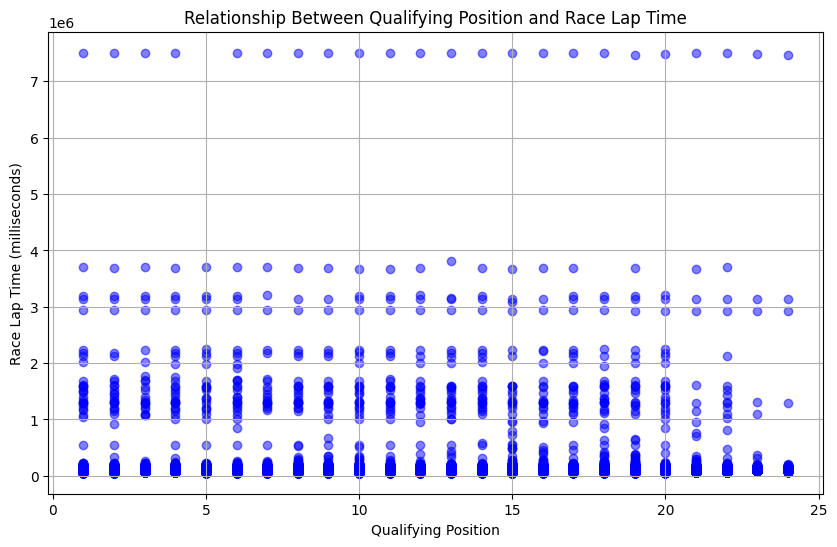

In [6]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['position_x'], merged_data['milliseconds'], color='blue', alpha=0.5)
plt.title('Relationship Between Qualifying Position and Race Lap Time')
plt.xlabel('Qualifying Position')
plt.ylabel('Race Lap Time (milliseconds)')
plt.grid(True)
plt.show()

**Analysis :**

A lower position number indicates a better qualifying performance, with the pole position being the best (usually position 1), and higher position numbers indicating a worse qualifying performance.
The vertical axis represents the race lap time of the drivers in milliseconds. A lower race lap time indicates a faster lap, while a higher race lap time indicates a slower lap.
There seems to be a positive correlation between qualifying position and race lap time. This means that as the qualifying position increases (or gets worse), the race lap time also tends to increase (or gets slower). 

This is a common trend in racing sports, where better-qualified racers tend to have faster lap times. But it is not always the case; as we can see some racers who are in 20-25 range of qualifying positions still manage to have a lower lap time in the final race.

Each point on the plot represents a driver's qualifying position and their corresponding race lap time. 
The concentration of data points at specific intervals for a example in the range 10000 to 20000 miliseconds could indicate common outcomes or popular strategies among racers.So as we can see there’s a high density of points around a certain lap time, it might mean that many racers are aiming for that time.
We can see a unusual an interesting outlier pattern in the graph, no matter the qualifying position there are racers who take 70000 ms which is 1 minutes and 10 seconds for a lap which shows a huge difference from other racers.This could represent exceptional performances or unusual events. These could be interesting to investigate further.




##### 3. How does the performance of drivers vary on street circuits compared to traditional circuits (located in Europian region)  in terms of their average qualifying positions?

First get the names of the circuits in the European region

In [7]:
# Merge the DataFrames including the 'circuits' DataFrame
merged_data = pd.merge(qualifying, races, on='raceId')
merged_data = pd.merge(merged_data, circuits, on='circuitId')

# Filter circuits in European countries
european_circuits = merged_data[merged_data['country'].isin(['Spain', 'Monaco', 'France', 'Italy', 'Germany', 'Belgium', 'Hungary', 'Austria', 'Russia', 'Netherlands'])]

# Get the names of the circuits
european_circuit_names = european_circuits['name_y'].unique()

# Print the names
print("Circuits in European countries:")
for circuit_name in european_circuit_names:
    print(circuit_name)

Circuits in European countries:
Circuit de Barcelona-Catalunya
Circuit de Monaco
Circuit de Nevers Magny-Cours
Hockenheimring
Hungaroring
Valencia Street Circuit
Circuit de Spa-Francorchamps
Autodromo Nazionale di Monza
Nürburgring
Autodromo Enzo e Dino Ferrari
Red Bull Ring
Circuito de Jerez
Sochi Autodrom
Circuit Paul Ricard
Autodromo Internazionale del Mugello
Circuit Park Zandvoort


According to the online resources we categorized the street circuits and traditional circuits in Europe.
- https://en.wikipedia.org/wiki/List_of_Formula_One_circuits
- https://www.redbull.com/int-en/10-best-street-circuits-formula-1-motorsport-worldwide

**Street Circuits**: These circuits are laid out on public roads in cities or urban areas. They typically have narrow tracks with tight corners and limited overtaking opportunities. Street circuits often require temporary modifications to existing road infrastructure to accommodate the race. 

**Traditional Circuits**: Also known as permanent circuits, traditional circuits are purpose-built tracks specifically designed for motorsport events. They are typically located outside urban areas and offer more varied and challenging layouts compared to street circuits. Traditional circuits often feature a mix of fast straights, sweeping corners, and elevation changes. 

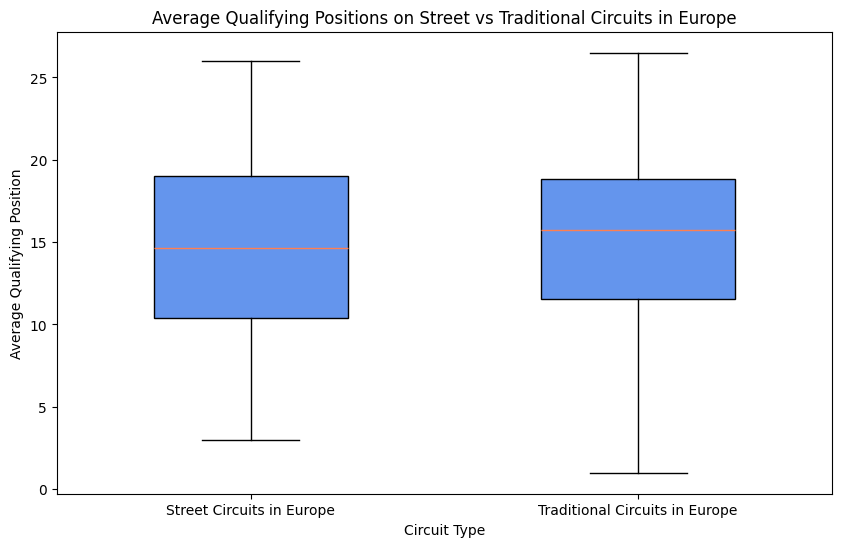

In [8]:

# Define street circuits and traditional circuits
street_circuits = ['Valencia Street Circuit', 'Circuit de Monaco', 'Circuito de Jerez', 'Sochi Autodrom']
traditional_circuits = ['Circuit de Barcelona-Catalunya', 'Circuit de Nevers Magny-Cours', 'Hockenheimring',
                        'Hungaroring', 'Circuit de Spa-Francorchamps', 'Autodromo Nazionale di Monza', 
                        'Nürburgring', 'Autodromo Enzo e Dino Ferrari', 'Red Bull Ring', 'Circuit Paul Ricard', 
                        'Autodromo Internazionale del Mugello', 'Circuit Park Zandvoort']

# Filter street circuits and traditional circuits
street_circuits_europe = european_circuits[european_circuits['name_y'].isin(street_circuits)]
traditional_circuits_europe = european_circuits[european_circuits['name_y'].isin(traditional_circuits)]

# Calculate the average qualifying position for drivers on street circuits in Europe
avg_qualifying_street_europe = street_circuits_europe.groupby('driverId')['position'].mean()

# Calculate the average qualifying position for drivers on traditional circuits in Europe
avg_qualifying_traditional_europe = traditional_circuits_europe.groupby('driverId')['position'].mean()

# Create a box plot
plt.figure(figsize=(10, 6))

# Plot boxplot for street circuits
boxplot_street = plt.boxplot(avg_qualifying_street_europe, positions=[1], widths=0.5, patch_artist=True, boxprops=dict(facecolor="cornflowerblue"), medianprops=dict(color="coral"))

# Plot boxplot for traditional circuits
boxplot_traditional = plt.boxplot(avg_qualifying_traditional_europe, positions=[2], widths=0.5, patch_artist=True, boxprops=dict(facecolor="cornflowerblue"), medianprops=dict(color="coral"))

# Add circuit names below the boxes
plt.xticks([1, 2], ['Street Circuits in Europe', 'Traditional Circuits in Europe'])

# Add title and labels
plt.title('Average Qualifying Positions on Street vs Traditional Circuits in Europe')
plt.xlabel('Circuit Type')
plt.ylabel('Average Qualifying Position')

# Show the plot
plt.show()


**Analysis :**

- Track Characteristics: Street circuits often present unique challenges such as tight corners, variable surface grip, and limited overtaking opportunities. Despite these challenges, drivers tend to perform better in qualifying sessions on street circuits, indicating their adaptability and skill in navigating these complex tracks. Traditional circuits, while more predictable in layout, still offer their own set of challenges that require drivers to optimize their performance.
- Driver Adaptability: The variability in qualifying positions on street circuits suggests that some drivers excel in adapting to the unpredictable nature of these tracks, while others may struggle to find consistency. This highlights the importance of driver adaptability and versatility in Formula 1, where success often depends on the ability to perform well across a diverse range of circuits.
- Team Strategies: Team strategies play a crucial role in determining qualifying performance, particularly on street circuits where track conditions can change rapidly. Teams that effectively analyze data, adjust setups, and anticipate changes in track conditions may have an advantage in securing favorable qualifying positions. Conversely, teams that fail to adapt to changing conditions may struggle to optimize their performance on race day.
- Competitive Balance: The fact that average qualifying positions for both street circuits and traditional circuits in Europe fall within the 10 to 20 range suggests a relatively high level of competitiveness and balance among drivers in Formula 1. This indicates that success in qualifying sessions is not solely determined by circuit type, but also by factors such as driver skill, team performance, and strategic decision-making.
- Impact on Race Outcomes: While qualifying performance is important, it's not the sole predictor of race outcomes. Factors such as race strategy, tire management, pit stop timing, and on-track incidents all play significant roles in determining race results. Therefore, while drivers may perform well in qualifying sessions, their ability to maintain consistency and make strategic decisions during the race itself ultimately determines their success.

# Conclusion

For the main research question, According to the  1st graph we can conclude context of Formula 1, the average qualifying position provides an overall indication of a driver's performance in qualifying sessions throughout a season or a specified period. It can serve as a metric to assess consistency and competitiveness relative to other drivers on the grid. And also the race stratergies are vary depending on the grid position like drivers starting from the front may opt for more aggressive strategies, aiming to build a gap to the cars behind or manage their pace to conserve tires and fuel. On the other hand, drivers starting from lower grid positions may need to adopt riskier strategies, such as early pit stops or alternative tire strategies, to gain track position.

According to the 2nd graph, we can conclude that in Formula 1, doing well in qualifying races—where drivers compete for their starting positions—often means a better chance of success in the actual race. However, the data shows that it's not always straightforward.While we expect drivers who start in better positions to have faster race times, there are surprises. Some drivers in lower positions still manage to do really well during the race, while others in top positions may face unexpected challenges.
The data also shows that some drivers consistently perform better than expected, even if they start from lower positions. This could be due to their skill, smart race strategies, or just luck.

Overall, Formula 1 racing is complex. It's not just about speed—it's about making smart decisions during the race, dealing with unexpected situations, and sometimes just being in the right place at the right time.

From the analysis on 3rd graph, we can see the complex interplay between driver performance, team strategies, and track characteristics in Formula 1 qualifying sessions. While drivers tend to perform better on street circuits on average, the variability in performance underscores the need for adaptability and versatility in this highly competitive sport. Further research and analysis can provide deeper insights into the factors influencing qualifying positions and their impact on race outcomes.



# Reflection

Doing further analysis on this area is really interesting. The main  facts that contributing to the final result is driver skill, race stratergies and car performance.  Exceptional drivers can sometimes overcome a poor grid position through skillful driving, strategic maneuvers, or aggressive overtaking. Similarly, a well-performing car can compensate for a lower grid position with superior speed and handling. In this we can analyze data from pit_stops,constructors, constructor_standings and constructor_result data.

In F1 constructor means the car manufacturing companies like McLaren,BMW,Honda,Ferari etc. Constructors data contains of  their name, nationality, and unique constructor ID.It provides details about the teams' participation in F1, their history, and any changes in ownership or team name over time.
While the constructor dataset itself may not directly include qualifying positions, By examining the constructor dataset, analysts can track the performance of individual teams over time and assess whether teams that perform well in qualifying sessions tend to have better race outcomes.

The constructor_standings dataset tracks the points earned by each team throughout the season based on their race results.
By analyzing more we can use this dataset to compare the qualifying positions of teams with their respective race results and championship standings.Teams that consistently qualify well and secure higher grid positions may be expected to earn more points in races and maintain higher positions in the constructor standings.

The constructor_results dataset provides detailed race results for each team, including their starting positions on the grid (qualifying positions) and finishing positions in races.
By analyzing this dataset, analysts can directly examine the relationship between qualifying positions and race outcomes for individual teams.
They can assess whether teams that start races from higher grid positions tend to achieve better race results, such as podium finishes or points-scoring positions.

 "Drivers who execute quicker pit stops tend to achieve better race results or if the timing of pit stops influences their overall race performance".We could have gone for this approch also as a further analysis.The pit_stops dataset contains records of each pit stop made by drivers during races, including the lap number, duration of the pit stop, and the type of tire change or other maintenance performed. If we could anaalyze this data it will to identify the frequency and timing of pit stops made by drivers during races.Pit stop strategy is an essential aspect of race management, and analyzing pit stop data allows researchers to evaluate the effectiveness of different pit stop strategies employed by teams.

 

During this project, I learned a lot about Formula 1 racing and how qualifying sessions affect race results.The journey was twofold: first, I immersed myself in the rich data surrounding F1 races, constructing hypotheses and seeking relevant sources to inform my analysis. Secondly, I honed my skills in data visualization and analysis, leveraging various tools and techniques to bring my insights to life.
If given the opportunity to revisit this project, I would undoubtedly follow the same path in tackling the research question with different approch sub questions with constructors and pit stops.And finally to acheive better analysis on this world famous racing event.